# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi.newsapi_client import NewsApiClient
%matplotlib inline

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [7]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [10]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [11]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin AND BTC",
    language="en",
   page_size=100
)                                            

In [13]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum AND ETH",
    language="en",
   page_size=100
)

In [14]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['content'])
      
        bitcoin_sentiments.append({
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols =["Compound", "Negative", "Neutral", "Positive", "Text"]
btc_df = btc_df[cols]

btc_df.head()

,Compound,Negative,Neutral,Positive,Text
0,-0.2960,0.062,0.937,0.00,A $1 billion transaction that flowed out of a ...
1,-0.5423,0.093,0.907,0.00,14 with 14 posters participating\r\nOn Wednesd...
2,0.2500,0.035,0.905,0.06,By Reuters Staff\r\nLONDON (Reuters) - Bank of...
3,0.2500,0.035,0.905,0.06,By Reuters Staff\r\nLONDON (Reuters) - Bank of...
4,0.4215,0.000,0.920,0.08,LONDON (Reuters) - Bitcoin's BTC=BTSP price ro...


In [18]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['content'])
      
        ethereum_sentiments.append({
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols =["Compound", "Negative", "Neutral", "Positive", "Text"]
eth_df = eth_df[cols]

eth_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.2023,0.058,0.861,0.081,"The price of Ethereum (ETH), the second-larges..."
1,0.1779,0.057,0.866,0.078,"October\r\n13, 2020\r\n7 min read\r\nOpinions ..."
2,0.0000,0.000,1.000,0.000,"According to various on-chain data, Ethereum m..."
3,0.2263,0.000,0.940,0.060,Predictive markets rollicked with U.S. ballot ...
4,0.8548,0.000,0.722,0.278,Ethereum’s popularity has congested the networ...


In [19]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Negative,Neutral,Positive
count,95.000000,95.000000,95.000000,95.000000
mean,0.214459,0.028989,0.891589,0.079411
std,0.415232,0.046858,0.074193,0.074990
min,-0.802000,0.000000,0.703000,0.000000
25%,0.000000,0.000000,0.841000,0.000000
50%,0.296000,0.000000,0.903000,0.076000
75%,0.521900,0.058500,0.935500,0.107000
max,0.880500,0.189000,1.000000,0.297000


In [20]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Negative,Neutral,Positive
count,98.000000,98.000000,98.000000,98.000000
mean,0.246590,0.021133,0.899214,0.079663
std,0.348177,0.036844,0.087885,0.079327
min,-0.750600,0.000000,0.576000,0.000000
25%,0.000000,0.000000,0.848000,0.000000
50%,0.202300,0.000000,0.920000,0.069000
75%,0.489600,0.046250,0.993000,0.120750
max,0.910900,0.200000,1.000000,0.353000


In [33]:
print(btc_df["Positive"].sum())
print(eth_df["Positive"].mean())

7.5440000000000005
0.07966326530612243


In [49]:
# Automatic comparisons for crypto values

# How many decimal places should we round to?
rounding = 5

print("Q: Which coin had the highest mean positive score?")

check_val_1 = "Positive"
check_1_a = round(btc_df[check_val_1].mean(), rounding)
check_1_b = round(eth_df[check_val_1].mean(), rounding)

if check_1_a > check_1_b:
    print(f"Bitcoin has the higher mean {check_val_1} score: {check_1_a}")
else:
    print(f"Ethereum has the higher mean {check_val_1} score: {check_1_b}")

print("\nQ: Which coin had the highest compound score?")

check_val_1 = "Compound"
check_2_a = round(btc_df[check_val_1].sum(), rounding)
check_2_b = round(eth_df[check_val_1].sum(), rounding)

if check_2_a > check_2_b:
    print(f"Bitcoin has the higher compound score: {check_2_a}")
else:
    print(f"Ethereum has the higher compound score: {check_2_b}")

check_val_1 = "Positive"
check_3_a = round(btc_df[check_val_1].max(), rounding)
check_3_b = round(eth_df[check_val_1].max(), rounding)

print("\nQ. Which coin had the highest positive score?")

if check_3_a > check_3_b:
    print(f"Bitcoin has the higher positive score: {check_3_a}")
else:
    print(f"Ethereum has the higher positive score: {check_3_b}")

Q: Which coin had the highest mean positive score?
Ethereum has the higher mean Positive score: 0.07966

Q: Which coin had the highest compound score?
Ethereum has the higher compound score: 24.1658

Q. Which coin had the highest positive score?
Ethereum has the higher positive score: 0.353


---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [50]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [51]:
# Expand the default stopwords list if necessary
addl_stopwords = [',', '', 'https', 'http', 'btc', 'bitcoin', 'eth', 'ethereum']

In [52]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    text = word_tokenize(text)
    # Convert the words to lowercase
    text = [word.lower() for word in text]
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    text = [regex.sub('', word) for word in text]
    # Remove the stop words
    sw = set(stopwords.words('english') + addl_stopwords)
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    text = [word for word in text if word not in sw]
    return text
    


In [53]:
# Create a new tokens column for bitcoin
btc_tokens = []
[btc_tokens.append(tokenizer(text)) for text in btc_df.Text]   
btc_df['Tokens'] = btc_tokens
btc_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,-0.2960,0.062,0.937,0.00,A $1 billion transaction that flowed out of a ...,"[billion, transaction, flowed, dormant, wallet..."
1,-0.5423,0.093,0.907,0.00,14 with 14 posters participating\r\nOn Wednesd...,"[poster, participating, wednesday, ar, reporte..."
2,0.2500,0.035,0.905,0.06,By Reuters Staff\r\nLONDON (Reuters) - Bank of...,"[reuters, staff, london, reuters, bank, englan..."
3,0.2500,0.035,0.905,0.06,By Reuters Staff\r\nLONDON (Reuters) - Bank of...,"[reuters, staff, london, reuters, bank, englan..."
4,0.4215,0.000,0.920,0.08,LONDON (Reuters) - Bitcoin's BTC=BTSP price ro...,"[london, reuters, btcbtsp, price, rose, thursd..."


In [54]:
# Create a new tokens column for ethereum
eth_tokens = []
[eth_tokens.append(tokenizer(text)) for text in eth_df.Text]   
eth_df['Tokens'] = eth_tokens
eth_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.2023,0.058,0.861,0.081,"The price of Ethereum (ETH), the second-larges...","[price, secondlargest, cryptocurrency, valued,..."
1,0.1779,0.057,0.866,0.078,"October\r\n13, 2020\r\n7 min read\r\nOpinions ...","[october, min, read, opinion, expressed, entre..."
2,0.0000,0.000,1.000,0.000,"According to various on-chain data, Ethereum m...","[according, various, onchain, data, miner, sel..."
3,0.2263,0.000,0.940,0.060,Predictive markets rollicked with U.S. ballot ...,"[predictive, market, rollicked, u, ballot, cou..."
4,0.8548,0.000,0.722,0.278,Ethereum’s popularity has congested the networ...,"[popularity, ha, congested, network, like, nev..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [55]:
from collections import Counter
from nltk import ngrams

In [56]:
# Generate the Bitcoin N-grams where N=2
btc_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in btc_df.Tokens]
dict(btc_bigram_counts[0].most_common(10))

{('billion', 'transaction'): 1,
 ('transaction', 'flowed'): 1,
 ('flowed', 'dormant'): 1,
 ('dormant', 'wallet'): 1,
 ('wallet', 'allegedly'): 1,
 ('allegedly', 'belonging'): 1,
 ('belonging', 'silk'): 1,
 ('silk', 'road'): 1,
 ('road', 'founder'): 1,
 ('founder', 'ross'): 1}

In [57]:
# Generate the Ethereum N-grams where N=2
eth_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in eth_df.Tokens]
dict(eth_bigram_counts[0].most_common(10))

{('price', 'secondlargest'): 1,
 ('secondlargest', 'cryptocurrency'): 1,
 ('cryptocurrency', 'valued'): 1,
 ('valued', 'billion'): 1,
 ('billion', 'declined'): 1,
 ('declined', 'hour'): 1,
 ('hour', 'steep'): 1,
 ('steep', 'drop'): 1,
 ('drop', 'followed'): 1,
 ('followed', 'whale'): 1}

In [58]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [59]:
# Get the top 10 words for Bitcoin
bigstr = []
for tokens in btc_df.Tokens:
    bigstr += tokens
btc_token_count = token_count(bigstr)
btc_token_count

[('char', 95),
 ('price', 23),
 ('ha', 23),
 ('li', 21),
 ('ul', 19),
 ('cryptocurrency', 17),
 ('market', 16),
 ('crypto', 15),
 ('around', 15),
 ('wa', 14)]

In [60]:
# Get the top 10 words for Ethereum
bigstr = []
for tokens in eth_df.Tokens:
    bigstr += tokens
eth_token_count = token_count(bigstr)
eth_token_count

[('char', 98),
 ('li', 45),
 ('ha', 28),
 ('ul', 28),
 ('price', 25),
 ('contract', 25),
 ('defi', 22),
 ('ether', 21),
 ('deposit', 19),
 ('market', 18)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

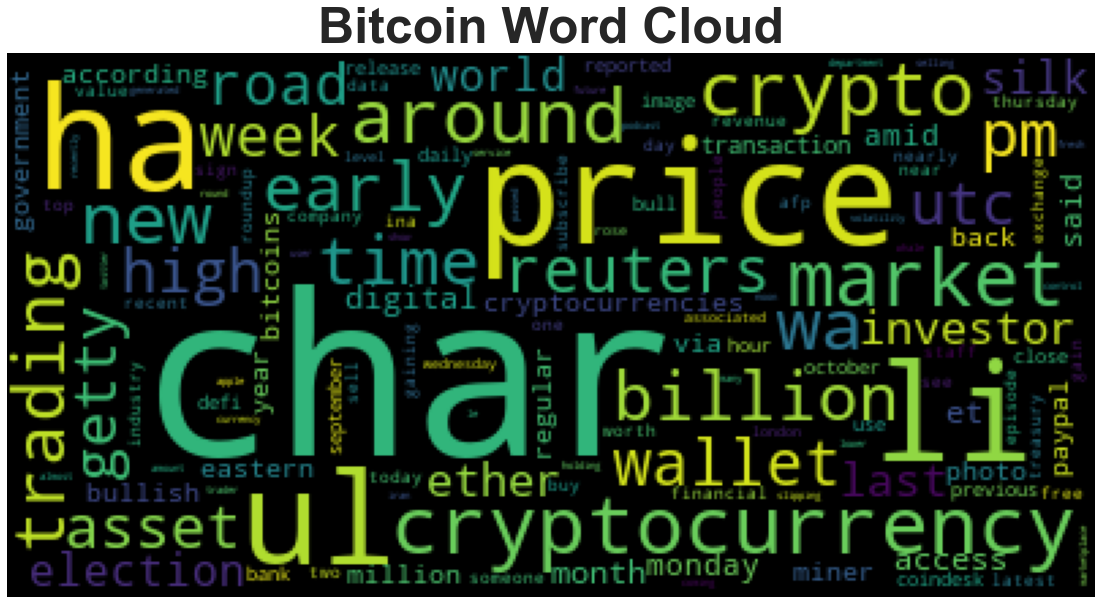

In [62]:
# Generate the Bitcoin word cloud
btc_corpus = ''
sw = set(stopwords.words('english') + addl_stopwords)
for token in btc_df.Text:
    btc_corpus += token
long_string = " ".join(str(x) for x in tokenizer(btc_corpus))
wc = WordCloud(collocations=False).generate(long_string)
plt.title('Bitcoin Word Cloud', fontsize=50, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc)
plt.axis("off")
plt.show()

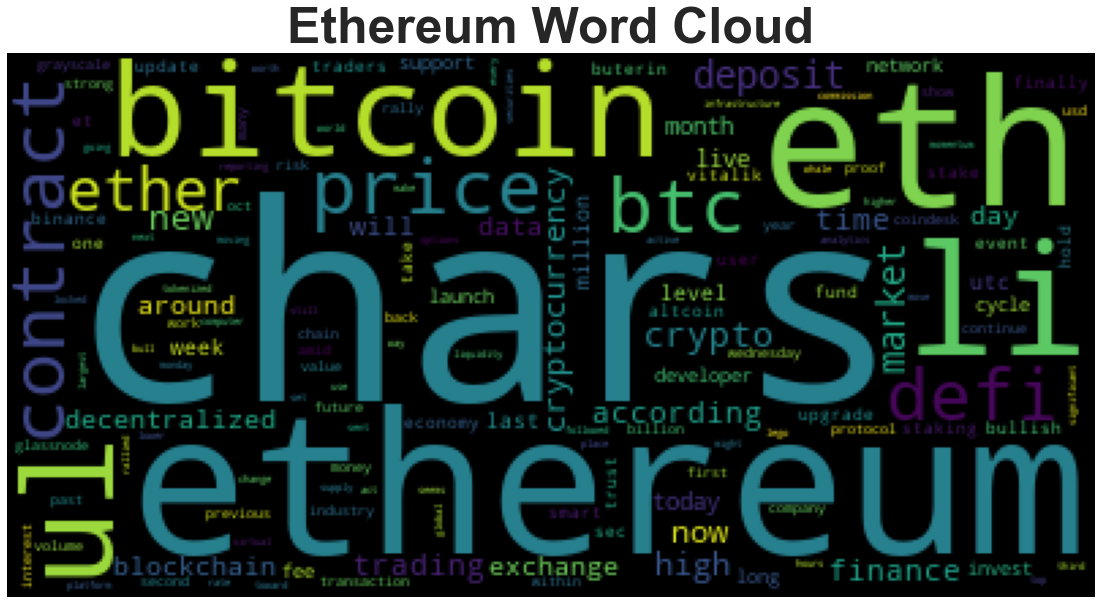

In [63]:
# Generate the Ethereum word cloud
eth_corpus = ''
for token in eth_df.Text:
    eth_corpus += token.lower()
long_string = " ".join(str(x) for x in tokenizer(eth_corpus))
wc = WordCloud(collocations=False).generate(eth_corpus)
plt.title('Ethereum Word Cloud', fontsize=50, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc)
plt.axis("off")
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [64]:
import spacy
from spacy import displacy

In [65]:
# Optional - download a language model for SpaCy
# !python -m spacy download en

In [66]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [67]:
# Concatenate all of the bitcoin text together
btc_corpus

 to see how Bitcoin BTC= had any intrinsic value and he cautioned over its use as a means of paym… [+420 chars]By Reuters Staff\r\nLONDON (Reuters) - Bank of England Governor Andrew Bailey said on Monday it was hard to see how Bitcoin BTC= had any intrinsic value and he cautioned over its use as a means of paym… [+420 chars]LONDON (Reuters) - Bitcoin's BTC=BTSP price rose to more than $14,900 on Thursday, its highest level since January 2018, amid volatility caused by the U.S. election and investor hopes that more centr… [+2480 chars]Earlier this week someone moved nearly a billion dollars worth of bitcoin (69,369 BTC\xa0) from a wallet address that hadn't been active since 2015. Speculation was rampant about who it could be. Kim Jo… [+1213 chars]Cryptocurrencies like bitcoin are a fun way to skirt money-laundering laws and pay for drugs, but, according to reporting by Reuters, it appears youll now be able to use it to pay for Beanie Babies a… [+3888 chars]More than seven years have pa

In [68]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_corpus)
btc_ner.user_data["title"] = "Bitcoin NER"

# Add a title to the document
# YOUR CODE HERE!

In [69]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [70]:
# List all Entities
btc_ents = set([ent.text for ent in btc_ner.ents ])
btc_ents

{'$1 billion',
 '$135 million',
 '$157 million',
 '$2.05 billion',
 '$250 billion',
 '$43 billion',
 '$50 million',
 '1',
 '1%',
 '1.3%',
 '1.36%',
 '1.5%',
 '1.8%',
 '1/',
 '10,000',
 '10,374',
 '12,000',
 '12th',
 '13, 2020',
 '13,005',
 '13,420',
 '13,859',
 '135 million',
 '14',
 '14,000',
 '15,000',
 '15,500',
 '15-month',
 '150,000',
 '2%',
 '2.5 months',
 '2.77%',
 '2008',
 '2013',
 '2015',
 '2018',
 '2019',
 '2020',
 '2020s',
 '20:00',
 '21%',
 '21:00',
 '230',
 '3 p.m. Eastern',
 '3%',
 '3,200',
 '30 minutes',
 '33%',
 '37',
 '38,250',
 '4 hours',
 '4 p.m.',
 '4 p.m. ET',
 '4%',
 '4,000',
 '6.4%',
 '69,369',
 '69,370',
 '7 min',
 '8 percent',
 '8%',
 'AFP',
 'AP',
 'Alexander Vinnik',
 'Amy Castor',
 'Andrew Bailey',
 'App',
 'Apple',
 'Apple Podcast',
 'Ars',
 'BTC',
 'BTC treasury',
 'BTC-USD',
 'BTSP',
 'Bank of England',
 'Beanie Babies',
 'Betw',
 'BiLira',
 'Bitc',
 'Bitcoin',
 'Bitcoin BTC',
 'Bitcoin Core',
 'Bloomberg',
 'Bloomberg Finance LP',
 'CBDC',
 'CME',
 'CNBC

---

## Ethereum NER

In [71]:
# Concatenate all of the bitcoin text together
eth_corpus

proof-of-work infrastructure to proof-of-stake. the end result of this upgrade will effectively take eth… [+4392 chars]in this tutorial, we\'ll write a simple smart contract, deploy it to a personal ethereum blockchain, and call the contract from a python script.\r\nwhat you need to have installed before we proceed:\r\n<u… [+5348 chars]now that ethereum 2.0 is finally set to go live, people face a crucial decision: whether or not to stake. it comes down to balancing the age-old calculus of risk and reward. ethereum 2.0 holds out th… [+5845 chars]in the face of ethereums recent rocketing transaction fees, its founder and chief scientist, vitalik buterin, called on users of the second-largest blockchain to move over to scaling solutions that a… [+3817 chars]the phrase gradually then suddenly has been overused in the crypto industry to emphasize the importance of each step towards regulatory support and institutional interest. \r\nwe had several such momen… [+3073 chars]ethereums berlin h

In [72]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_corpus)
eth_ner.user_data["title"] = "Ethereum NER"

# Add a title to the document
# YOUR CODE HERE!

In [73]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [74]:
# List all Entities
eth_ents = ([ent.text for ent in eth_ner.ents ])
set(eth_ents)

{'$1 billion',
 '$1 million',
 '$1.2 million',
 '$1.5 billion',
 '$360 million',
 '$43 billion',
 '0xe6e2e',
 '1.8%',
 '10',
 '10%',
 '10.50%',
 '100',
 '11,355',
 '11,600',
 '11,720',
 '12,000',
 '13, 2020',
 '13,000',
 '14,000',
 '14,100',
 '14,259',
 '15,500',
 '15,960',
 '1559',
 '15:00',
 '16,000',
 '17-month',
 '2',
 '2.0',
 '20 minutes',
 '2014',
 '2017',
 '202',
 '2020',
 '20:00',
 '21:00',
 '3,200',
 '32',
 '366',
 '370',
 '381',
 '383',
 '387.75',
 '390',
 '4 hours',
 '4 p.m. et',
 '4%',
 '4,000',
 '400',
 '408',
 '420.</li><li',
 '422',
 '447',
 '50,849 ether',
 '50-day',
 '500',
 '50k',
 '524,288',
 '6-12 month',
 '66%',
 '6:30 p.m.',
 '7 min',
 '8.15%',
 '80',
 '9 a.m.',
 '970,000',
 '98%',
 '</li><li',
 'a few months',
 'a few weeks',
 'a full day',
 'aaron stanley',
 'about 14 hours ago',
 'above $390',
 'above $422',
 'afri schoedon',
 'amsterdam',
 'app',
 'approximately $22 million',
 'around $11,910',
 'around $13,011',
 'around $13,519',
 'around $14,061',
 'around 